In [1]:
import matplotlib.pyplot as plt
import datetime 
import scipy.integrate as integrate
from tqdm.notebook import tqdm
import math

In [2]:
def dichotomy(f, left_border, right_border, eps=1e-5):
    iterations = 0
    delta = eps / 2
    while (right_border - left_border > eps):
        iterations += 1
        middle = (left_border + right_border) / 2
        x_left = middle - delta
        x_right = middle + delta
        
        f_left = f(x_left)
        f_right = f(x_right)
        
        if f_left < f_right:
            right_border = x_right
        elif f_left > f_right:
            left_border = x_left
        else:
            return middle, iterations
    return (left_border + right_border) / 2, iterations

In [3]:
def golden(f, left_border, right_border, eps=1e-5):
    phi = (1 + math.sqrt(5)) / 2
    iterations = 0
    
    interval_len = right_border - left_border
    x_left = left_border + (2 - phi) * interval_len
    x_right = right_border - (2 - phi) * interval_len
    f_left = f(x_left)
    f_right = f(x_right)
    
    while interval_len > eps:
        iterations += 1
        if f_left < f_right:
            right_border = x_right
            x_right = x_left
            f_right = f_left
            interval_len = right_border - left_border
            x_left = left_border + (2 - phi) * interval_len
            f_left = f(x_left)
        elif f_left > f_right:
            left_border = x_left
            x_left = x_right
            f_left = f_right
            interval_len = right_border - left_border
            x_right = right_border - (2 - phi) * interval_len
            f_right = f(x_right)
        else:
            return (right_border + left_border) / 2, iterations
    return (right_border + left_border) / 2, iterations

In [4]:
def fib(f, left_border, right_border, n):
    total_iters = n
    fibs = [1, 1]
    while len(fibs) < n + 1:
        fibs.append(fibs[-1] + fibs[-2])
        
    interval_len = right_border - left_border
    x_left = left_border + (fibs[n - 2] / fibs[n]) * interval_len
    x_right = left_border + (fibs[n - 1] / fibs[n]) * interval_len
    f_left = f(x_left)
    f_right = f(x_right)
    
    while n > 2:
        n -= 1
        if f_left < f_right:
            right_border = x_right
            x_right = x_left
            f_right = f_left
            interval_len = right_border - left_border
            x_left = left_border + (fibs[n - 2] / fibs[n]) * interval_len
            f_left = f(x_left)
        elif f_left > f_right:
            left_border = x_left
            x_left = x_right
            f_left = f_right
            interval_len = right_border - left_border
            x_right = left_border + (fibs[n - 1] / fibs[n]) * interval_len
            f_right = f(x_right)
        else:
            return (right_border + left_border) / 2, right_border - left_border
    return (right_border + left_border) / 2, right_border - left_border

In [5]:
def make_plots(method, f, left_border, right_border, params, retry_count=1000, params_is_eps=True):
    time = []
    answers = []
    second_params = []
    for param in tqdm(params):
        mean_answer = 0.
        mean_time = 0.
        mean_second_param = 0.
        
        for _ in range(retry_count):
            start_time = datetime.datetime.now()
            answer, second_param = method(f, left_border, right_border, param)
            end_time = datetime.datetime.now()
            timedelta = end_time - start_time
            mean_time += timedelta.microseconds
            mean_answer += answer
            mean_second_param += second_param
        
        time.append(mean_time / retry_count)
        answers.append(mean_answer / retry_count)
        second_params.append(mean_second_param / retry_count)
        
    plt.figure()
    plt.title('Time to calculate')
    plt.ylabel('time, microseconds')
    if params_is_eps:
        plt.xlabel('lg(eps)')
        plt.semilogx(params, time)
    else:
        plt.xlabel('Number of calculations')
        plt.plot(params, time)
    plt.show()
    
    plt.figure()
    plt.title('Answer')
    plt.ylabel('answer')
    if params_is_eps:
        plt.xlabel('lg(eps)')
        plt.semilogx(params, answers)
    else:
        plt.xlabel('Number of calculations')
        plt.plot(params, answers)
    plt.show()
    
    plt.figure()
    plt.title('Number of calculations and eps')
    if params_is_eps:
        plt.xlabel('lg(eps)')
        plt.ylabel('Number of calculations')
        plt.semilogx(params, second_params)
    else:
        plt.xlabel('Number of calculations')
        plt.ylabel('lg(eps)')
        plt.semilogy(params, second_params)
    plt.show()

In [6]:
def f(x):
    integral, err = integrate.quad(lambda t: 2 * t, 0, x)
    return integral

In [7]:
e_s = [10 ** x for x in range(-10, 3)]

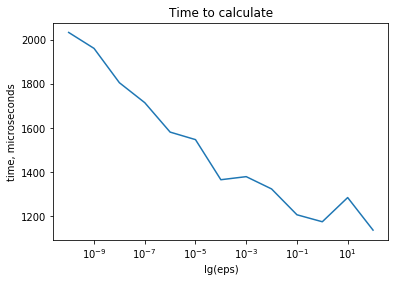

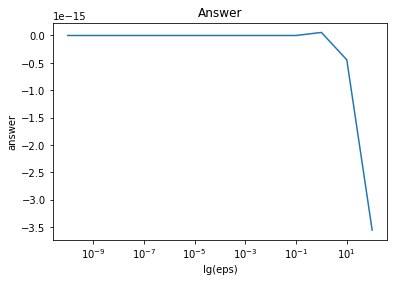

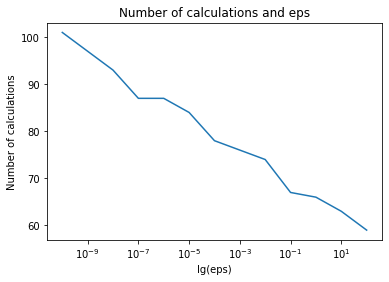

In [8]:
make_plots(dichotomy, f, -1400, 8800, e_s, params_is_eps=True)

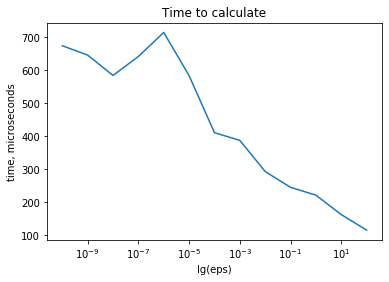

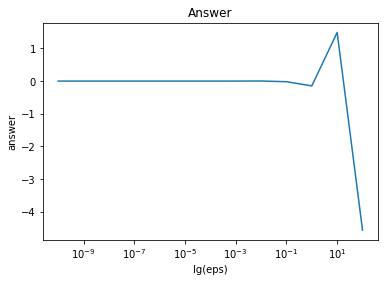

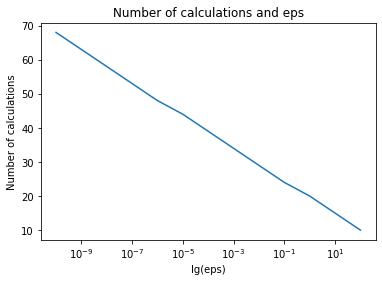

In [9]:
make_plots(golden, f, -1400, 8800, e_s, params_is_eps=True)

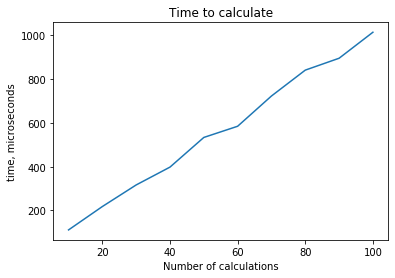

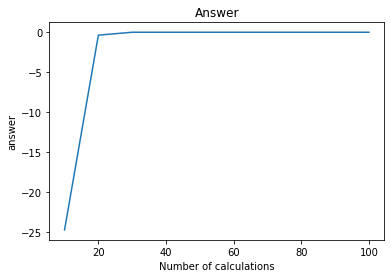

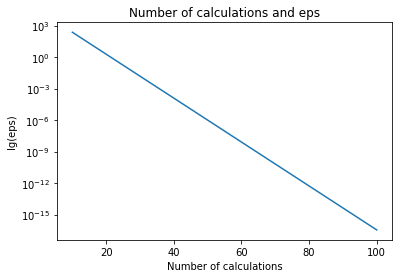

In [10]:
ns = [10 * i for i in range(1, 11)]
make_plots(fib, f, -1400, 8800, ns, params_is_eps=False)